In [30]:
import pandas as pd
from plotting import plot_boxplots_and_outliers, plot_numeric_distributions, plot_value_counts, plot_correlation_matrix, plot_by_year_buckets

In [31]:
# load experimental/albums.json into dataframe
df = pd.read_json('../data/experimental/artists.json')

In [32]:
df.head()

,id,uri,name,genres,popularity,followers,albums,top_tracks
0,1Xyo4u8uXC1ZmMpatF05PJ,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,"[canadian contemporary r&b, canadian pop, pop]",91,82994560,"[35dut3ICqF3NEDkjxfzJJ1, 1OARrXe5sB0gyy3MhQ8h9...","[7CyPwkp0oE8Ro9Dd5CUDjW, 7MXVkk9YMctZqd1Srtv4M..."
1,72iCiKwu6nu6Qq9emIwzYv,spotify:artist:72iCiKwu6nu6Qq9emIwzYv,Kayzo,"[brostep, speed house]",50,228549,"[3z7otCLPeYt98e8U9bgWGt, 0RTU6XjmR2EBcY8rJwUgs...","[6wUK8WB3cbNUAAGjNmKy3M, 4efvHnBxgvaLqIUuMcnMC..."
2,2IB9PgY9PMJklQlRQHDntA,spotify:artist:2IB9PgY9PMJklQlRQHDntA,Yeahman,"[latintronica, tropical alternativo]",45,38184,"[5WB36fISRthlE3LFhhhbS2, 3jLWAXJ3NdQOoagDdia99...","[1h6i0ETE1wdClYTi8ppsu6, 4QoktJPw2SSKoIND51Haq..."
3,2YZyLoL8N0Wb9xBt1NhZWg,spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,"[conscious hip hop, hip hop, rap, west coast rap]",89,28443543,"[79ONNoS4M9tfIA1mYLBYVX, 3pLdWdkj83EYfDN6H2N8M...","[2tudvzsrR56uom6smgOcSf, 77DRzu7ERs0TX3roZcre7..."
4,1bAdBYcsDdsbqmWbAE7qKR,spotify:artist:1bAdBYcsDdsbqmWbAE7qKR,JJ,"[balearic, swedish indie pop]",42,29043,"[765sjxPPLm8LTU9ru4dpbe, 4frSVxXRguBr28EvXNrL8...","[00Nsyeo2kcU4602zMsLWXW, 6pmGxFlNR3xtL1rzOMTDw..."


In [33]:
df.shape

(338, 8)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          338 non-null    object
 1   uri         338 non-null    object
 2   name        338 non-null    object
 3   genres      338 non-null    object
 4   popularity  338 non-null    int64 
 5   followers   338 non-null    int64 
 6   albums      338 non-null    object
 7   top_tracks  338 non-null    object
dtypes: int64(2), object(6)
memory usage: 21.2+ KB


In [35]:
df.describe(include='all')

,id,uri,name,genres,popularity,followers,albums,top_tracks
count,338,338,338,338,338.000000,3.380000e+02,338,338
unique,338,338,338,270,NaN,NaN,337,336
top,1Xyo4u8uXC1ZmMpatF05PJ,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,[],NaN,NaN,[],[]
freq,1,1,1,46,NaN,NaN,2,3
mean,NaN,NaN,NaN,NaN,50.437870,2.301346e+06,NaN,NaN
std,NaN,NaN,NaN,NaN,17.118473,9.161278e+06,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,3.100000e+01,NaN,NaN
25%,NaN,NaN,NaN,NaN,41.000000,3.018400e+04,NaN,NaN
50%,NaN,NaN,NaN,NaN,51.000000,1.717445e+05,NaN,NaN
75%,NaN,NaN,NaN,NaN,62.000000,9.013065e+05,NaN,NaN


In [36]:
# check NAs
df.isna().sum()

id            0
uri           0
name          0
genres        0
popularity    0
followers     0
albums        0
top_tracks    0
dtype: int64

The following columns contain a lot of unique values: id, uri, name.

In [37]:
# check the number of unique values for id, uri, name, label
print(f"In total, there are {df.shape[0]} artists in the DataFrame.")
print(f"There are {df['id'].nunique()} unique values for 'id'.")
print(f"There are {df['uri'].nunique()} unique values for 'uri'.")
print(f"There are {df['name'].nunique()} unique values for 'name'.")

In total, there are 338 artists in the DataFrame.
There are 338 unique values for 'id'.
There are 338 unique values for 'uri'.
There are 338 unique values for 'name'.


## Numeric columns

In [38]:
df.describe()

,popularity,followers
count,338.000000,3.380000e+02
mean,50.437870,2.301346e+06
std,17.118473,9.161278e+06
min,0.000000,3.100000e+01
25%,41.000000,3.018400e+04
50%,51.000000,1.717445e+05
75%,62.000000,9.013065e+05
max,93.000000,8.735408e+07


In [39]:
df.sort_values(by='popularity', ascending=False).head(10)

,id,uri,name,genres,popularity,followers,albums,top_tracks
194,3TVXtAsR1Inumwj472S9r4,spotify:artist:3TVXtAsR1Inumwj472S9r4,Drake,"[canadian hip hop, canadian pop, hip hop, pop ...",93,87354078,"[4Q7cRXio6mF2ImVUCcezPO, 4czdORdCWP9umpbhFXK2f...","[3eh51r6rFWAlGQRlHx9QnQ, 1zi7xx7UVEFkmKfv06H8x..."
0,1Xyo4u8uXC1ZmMpatF05PJ,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,"[canadian contemporary r&b, canadian pop, pop]",91,82994560,"[35dut3ICqF3NEDkjxfzJJ1, 1OARrXe5sB0gyy3MhQ8h9...","[7CyPwkp0oE8Ro9Dd5CUDjW, 7MXVkk9YMctZqd1Srtv4M..."
312,0Y5tJX1MQlPlqiwlOH1tJY,spotify:artist:0Y5tJX1MQlPlqiwlOH1tJY,Travis Scott,"[hip hop, rap, slap house]",90,29129302,"[18NOKLkZETa4sWwLMIm0UZ, 1Sf8GsXG32t0jNrX11xqW...","[42VsgItocQwOQC3XWZ8JNA, 28drn6tQo95MRvO0jQEo5..."
152,5K4W6rqBFWDnAN6FQUkS6x,spotify:artist:5K4W6rqBFWDnAN6FQUkS6x,Kanye West,"[chicago rap, hip hop, rap]",89,25189937,"[30zwjSQEodaUXCn11nmiVF, 2Wiyo7LzdeBCsVZiRA6vV...","[3w0w2T288dec0mgeZZqoNN, 4EWCNWgDS8707fNSZ1oaA..."
3,2YZyLoL8N0Wb9xBt1NhZWg,spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,"[conscious hip hop, hip hop, rap, west coast rap]",89,28443543,"[79ONNoS4M9tfIA1mYLBYVX, 3pLdWdkj83EYfDN6H2N8M...","[2tudvzsrR56uom6smgOcSf, 77DRzu7ERs0TX3roZcre7..."
292,246dkjvS1zLTtiykXe5h60,spotify:artist:246dkjvS1zLTtiykXe5h60,Post Malone,"[dfw rap, melodic rap, pop, rap]",87,43756183,"[1F9LY06gadScF4g3g3BrDC, 6r1lh7fHMB499vGKtIyJL...","[2OzhQlSqBEmt7hmkYxfT6m, 0RiRZpuVRbi7oqRdSMwhQ..."
80,00FQb4jTyendYWaN8pK0wa,spotify:artist:00FQb4jTyendYWaN8pK0wa,Lana Del Rey,"[art pop, pop]",87,34797066,"[5HOHne1wzItQlIYmLXLYfZ, 2wwCc6fcyhp1tfY3J6Jav...","[3BJe4B8zGnqEdQPMvfVjuS, 6GGtHZgBycCgGBUhZo81x..."
53,7dGJo4pcD2V6oG8kP0tJRR,spotify:artist:7dGJo4pcD2V6oG8kP0tJRR,Eminem,"[detroit hip hop, hip hop, rap]",86,83742007,"[5EUgcfO5OWxnniHR3QYFcK, 3aTuW4BtsyyyyQa9LKqj8...","[7lQ8MOhq6IN2w8EYcFNSUk, 561jH07mF1jHuk7KlaeF0..."
133,2h93pZq0e7k5yf4dywlkpM,spotify:artist:2h93pZq0e7k5yf4dywlkpM,Frank Ocean,"[lgbtq+ hip hop, neo soul]",82,13710772,"[3mH6qwIy9crq0I9YQbOuDf, 392p3shh2jkxUxY2VHvlH...","[3xKsf9qdS1CyvXSMEid6g8, 7DfFc7a6Rwfi3YQMRbDMa..."
263,7Ln80lUS6He07XvHI8qqHH,spotify:artist:7Ln80lUS6He07XvHI8qqHH,Arctic Monkeys,"[garage rock, modern rock, permanent wave, roc...",82,24506948,"[2GROf0WKoP5Er2M9RXVNNs, 7Heaa0B4KOxdWhSICTR2w...","[5XeFesFbtLpXzIVDNQP22n, 0BxE4FqsDD1Ot4YuBXwAP..."


In [40]:
# 0 popularity
df[df['popularity'] == 0]

,id,uri,name,genres,popularity,followers,albums,top_tracks
5,0pRuXv2OXnUEOe9HHMNJye,spotify:artist:0pRuXv2OXnUEOe9HHMNJye,Bambino Prodigio,[],0,666,"[01TTVqj6CODBvoz35QNjDj, 6wSoj4QIaJzUTgqCGxN1e...","[6X9ppEffiYGs672R7uReVg, 096MrmHeki1JzX1aMostz..."
30,7r1VJ53RGn5jqR98Sgpe9l,spotify:artist:7r1VJ53RGn5jqR98Sgpe9l,Elli Eli,[],0,4116,[0dLuWZHyjOXhYRzaGWw5Dv],"[7xOpQZSxd04DgRcFf99xTL, 0STgyT9RdXB4q3qK4SJ1vX]"
62,6jdLQbJfJuo1uZf5TiHcpL,spotify:artist:6jdLQbJfJuo1uZf5TiHcpL,elin kastlander,[],0,31,[],[]
169,0LyfQWJT6nXafLPZqxe9Of,spotify:artist:0LyfQWJT6nXafLPZqxe9Of,Various Artists,[],0,2413050,[],"[4Y2iP7H0ouyXORPBUGRQKx, 0E5yP9VjrfG7wRyjWN9tr..."


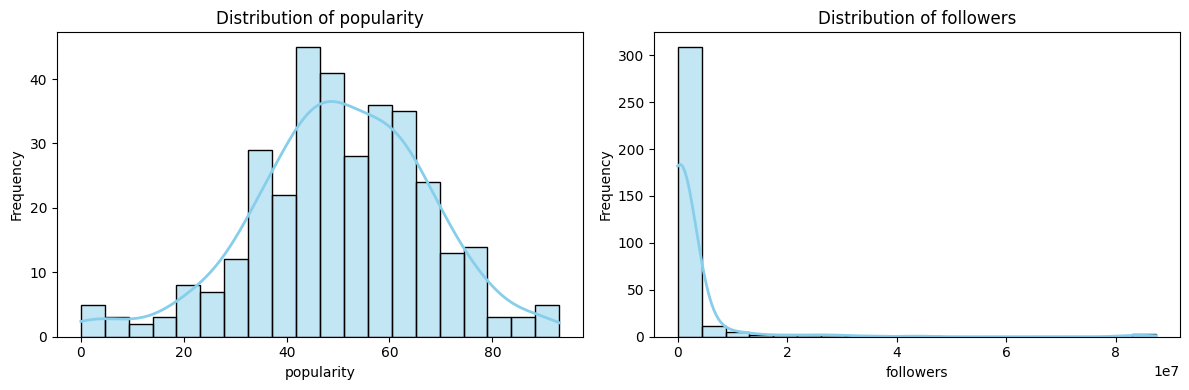

In [41]:
plot_numeric_distributions(df)

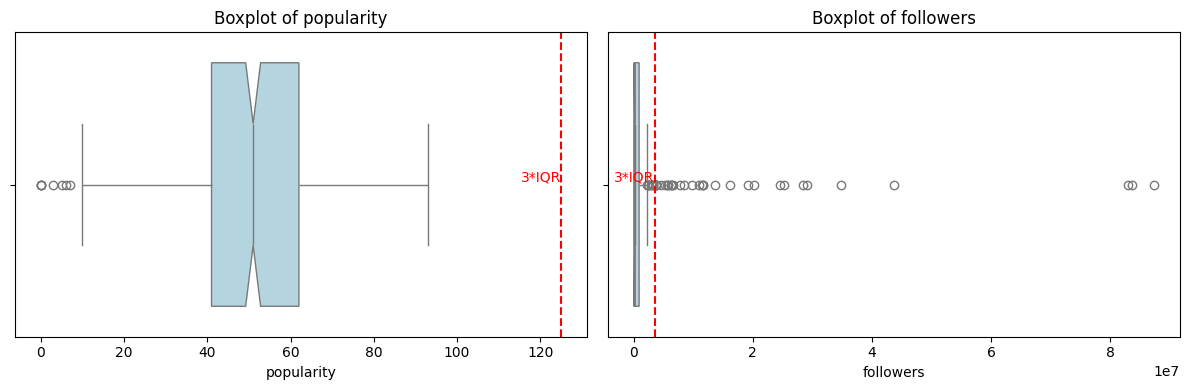

In [42]:
plot_boxplots_and_outliers(df)

In [43]:
# get popularity less than 10
df[df['popularity'] < 10]

,id,uri,name,genres,popularity,followers,albums,top_tracks
5,0pRuXv2OXnUEOe9HHMNJye,spotify:artist:0pRuXv2OXnUEOe9HHMNJye,Bambino Prodigio,[],0,666,"[01TTVqj6CODBvoz35QNjDj, 6wSoj4QIaJzUTgqCGxN1e...","[6X9ppEffiYGs672R7uReVg, 096MrmHeki1JzX1aMostz..."
14,4dkFGTxRsTtgHDVvvR04Ob,spotify:artist:4dkFGTxRsTtgHDVvvR04Ob,Unravel,[australian hardcore],5,2664,"[64bKN0IE308F3vLdlRjOlC, 0LGbeVJEsTgewFDDXdAWv...","[3vFCT1nG1iWjpScvhgpfyI, 2dRg9x3qJW3GlHdccfwCb..."
30,7r1VJ53RGn5jqR98Sgpe9l,spotify:artist:7r1VJ53RGn5jqR98Sgpe9l,Elli Eli,[],0,4116,[0dLuWZHyjOXhYRzaGWw5Dv],"[7xOpQZSxd04DgRcFf99xTL, 0STgyT9RdXB4q3qK4SJ1vX]"
62,6jdLQbJfJuo1uZf5TiHcpL,spotify:artist:6jdLQbJfJuo1uZf5TiHcpL,elin kastlander,[],0,31,[],[]
124,3TWdfQFoT40tFweaNKRzni,spotify:artist:3TWdfQFoT40tFweaNKRzni,Gangplans,[],6,1338,"[1oxbP5QLz3BNdBBAjZuNCS, 3N6dTyddi92DANpstPsVG...","[1GvrrKeINHgvgoX2KF9lHo, 13ipoZZ1Y0Tdert3jfjvg..."
169,0LyfQWJT6nXafLPZqxe9Of,spotify:artist:0LyfQWJT6nXafLPZqxe9Of,Various Artists,[],0,2413050,[],"[4Y2iP7H0ouyXORPBUGRQKx, 0E5yP9VjrfG7wRyjWN9tr..."
262,01eG7QvHOYeU2DM2951Opm,spotify:artist:01eG7QvHOYeU2DM2951Opm,29BabyJ,[corecore],7,932,"[0NctDGPa54lUnjuo7lwiMz, 12gKxlprASHmfb3xzAa6G...","[3GBatvWCwu3BbCkOnW1aKH, 1zrHEWtn7fFHBbynq4ECR..."
330,6Y43bUHBIIXbMw8TMkTIAf,spotify:artist:6Y43bUHBIIXbMw8TMkTIAf,Eugene Naumov,[],3,82,"[4YEyC7kUIfHSwtR3WJJW8h, 3YTqLnABdkiAU8DmLLvQll]","[6F8htsok8BD2DigTgifNt2, 46DrMmT3qc45ZDIjOpxKQK]"


In [44]:
# get extreme outliers of followers column
Q1 = df['followers'].quantile(0.25)
Q3 = df['followers'].quantile(0.75)
IQR = Q3 - Q1
extreme_outliers = df[(df['followers'] < (Q1 - 3 * IQR)) | (df['followers'] > (Q3 + 3 * IQR))]
extreme_outliers.sort_values(by='followers', ascending=False)

,id,uri,name,genres,popularity,followers,albums,top_tracks
194,3TVXtAsR1Inumwj472S9r4,spotify:artist:3TVXtAsR1Inumwj472S9r4,Drake,"[canadian hip hop, canadian pop, hip hop, pop ...",93,87354078,"[4Q7cRXio6mF2ImVUCcezPO, 4czdORdCWP9umpbhFXK2f...","[3eh51r6rFWAlGQRlHx9QnQ, 1zi7xx7UVEFkmKfv06H8x..."
53,7dGJo4pcD2V6oG8kP0tJRR,spotify:artist:7dGJo4pcD2V6oG8kP0tJRR,Eminem,"[detroit hip hop, hip hop, rap]",86,83742007,"[5EUgcfO5OWxnniHR3QYFcK, 3aTuW4BtsyyyyQa9LKqj8...","[7lQ8MOhq6IN2w8EYcFNSUk, 561jH07mF1jHuk7KlaeF0..."
0,1Xyo4u8uXC1ZmMpatF05PJ,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,"[canadian contemporary r&b, canadian pop, pop]",91,82994560,"[35dut3ICqF3NEDkjxfzJJ1, 1OARrXe5sB0gyy3MhQ8h9...","[7CyPwkp0oE8Ro9Dd5CUDjW, 7MXVkk9YMctZqd1Srtv4M..."
292,246dkjvS1zLTtiykXe5h60,spotify:artist:246dkjvS1zLTtiykXe5h60,Post Malone,"[dfw rap, melodic rap, pop, rap]",87,43756183,"[1F9LY06gadScF4g3g3BrDC, 6r1lh7fHMB499vGKtIyJL...","[2OzhQlSqBEmt7hmkYxfT6m, 0RiRZpuVRbi7oqRdSMwhQ..."
80,00FQb4jTyendYWaN8pK0wa,spotify:artist:00FQb4jTyendYWaN8pK0wa,Lana Del Rey,"[art pop, pop]",87,34797066,"[5HOHne1wzItQlIYmLXLYfZ, 2wwCc6fcyhp1tfY3J6Jav...","[3BJe4B8zGnqEdQPMvfVjuS, 6GGtHZgBycCgGBUhZo81x..."
312,0Y5tJX1MQlPlqiwlOH1tJY,spotify:artist:0Y5tJX1MQlPlqiwlOH1tJY,Travis Scott,"[hip hop, rap, slap house]",90,29129302,"[18NOKLkZETa4sWwLMIm0UZ, 1Sf8GsXG32t0jNrX11xqW...","[42VsgItocQwOQC3XWZ8JNA, 28drn6tQo95MRvO0jQEo5..."
3,2YZyLoL8N0Wb9xBt1NhZWg,spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,"[conscious hip hop, hip hop, rap, west coast rap]",89,28443543,"[79ONNoS4M9tfIA1mYLBYVX, 3pLdWdkj83EYfDN6H2N8M...","[2tudvzsrR56uom6smgOcSf, 77DRzu7ERs0TX3roZcre7..."
152,5K4W6rqBFWDnAN6FQUkS6x,spotify:artist:5K4W6rqBFWDnAN6FQUkS6x,Kanye West,"[chicago rap, hip hop, rap]",89,25189937,"[30zwjSQEodaUXCn11nmiVF, 2Wiyo7LzdeBCsVZiRA6vV...","[3w0w2T288dec0mgeZZqoNN, 4EWCNWgDS8707fNSZ1oaA..."
263,7Ln80lUS6He07XvHI8qqHH,spotify:artist:7Ln80lUS6He07XvHI8qqHH,Arctic Monkeys,"[garage rock, modern rock, permanent wave, roc...",82,24506948,"[2GROf0WKoP5Er2M9RXVNNs, 7Heaa0B4KOxdWhSICTR2w...","[5XeFesFbtLpXzIVDNQP22n, 0BxE4FqsDD1Ot4YuBXwAP..."
136,0k17h0D3J5VfsdmQ1iZtE9,spotify:artist:0k17h0D3J5VfsdmQ1iZtE9,Pink Floyd,"[album rock, art rock, classic rock, progressi...",75,20181552,"[3v9Emq8Cv300wNpF3AVFWw, 3hlRTl7wuUk2O3PI1RTvs...","[7rPzEczIS574IgPaiPieS3, 1HzDhHApjdjXPLHF6GGYh..."


The nature of follower count is that it is a very skewed distribution. The vast majority of artists have very few followers, while a few have a lot. This is why the mean is so much higher than the median, and there are a lot of extreme outliers with the 3*IQR rule.

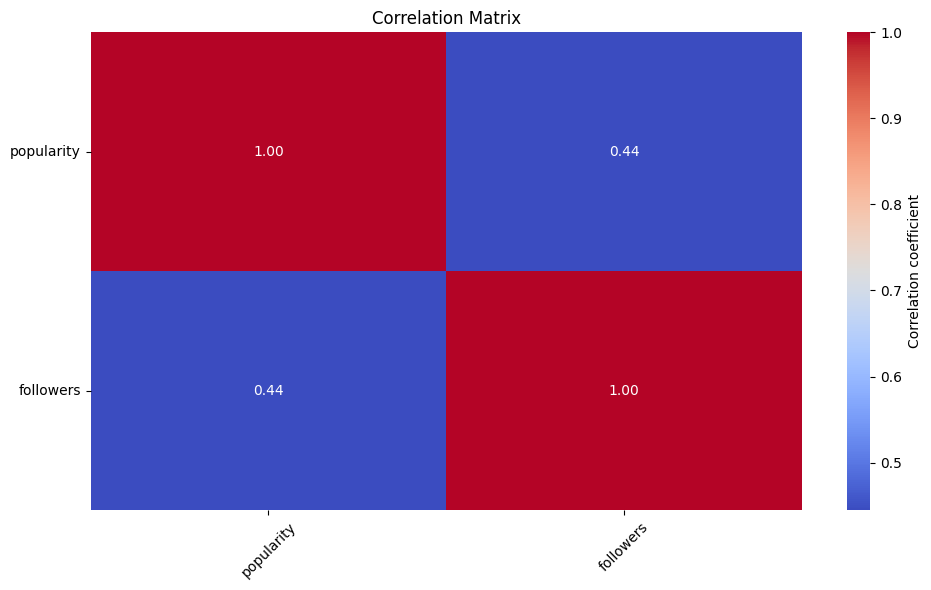

In [45]:
plot_correlation_matrix(df)

## Array-like columns

In [46]:
array_like_columns = ['genres', 'albums', 'top_tracks']
df_copy = df.copy()

for col in array_like_columns:
    df_copy[f"{col}_length"] = df_copy[col].apply(lambda x: len(x))

In [47]:
df_copy.head()

,id,uri,name,genres,popularity,followers,albums,top_tracks,genres_length,albums_length,top_tracks_length
0,1Xyo4u8uXC1ZmMpatF05PJ,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,"[canadian contemporary r&b, canadian pop, pop]",91,82994560,"[35dut3ICqF3NEDkjxfzJJ1, 1OARrXe5sB0gyy3MhQ8h9...","[7CyPwkp0oE8Ro9Dd5CUDjW, 7MXVkk9YMctZqd1Srtv4M...",3,1203,10
1,72iCiKwu6nu6Qq9emIwzYv,spotify:artist:72iCiKwu6nu6Qq9emIwzYv,Kayzo,"[brostep, speed house]",50,228549,"[3z7otCLPeYt98e8U9bgWGt, 0RTU6XjmR2EBcY8rJwUgs...","[6wUK8WB3cbNUAAGjNmKy3M, 4efvHnBxgvaLqIUuMcnMC...",2,88,10
2,2IB9PgY9PMJklQlRQHDntA,spotify:artist:2IB9PgY9PMJklQlRQHDntA,Yeahman,"[latintronica, tropical alternativo]",45,38184,"[5WB36fISRthlE3LFhhhbS2, 3jLWAXJ3NdQOoagDdia99...","[1h6i0ETE1wdClYTi8ppsu6, 4QoktJPw2SSKoIND51Haq...",2,20,10
3,2YZyLoL8N0Wb9xBt1NhZWg,spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,"[conscious hip hop, hip hop, rap, west coast rap]",89,28443543,"[79ONNoS4M9tfIA1mYLBYVX, 3pLdWdkj83EYfDN6H2N8M...","[2tudvzsrR56uom6smgOcSf, 77DRzu7ERs0TX3roZcre7...",4,285,10
4,1bAdBYcsDdsbqmWbAE7qKR,spotify:artist:1bAdBYcsDdsbqmWbAE7qKR,JJ,"[balearic, swedish indie pop]",42,29043,"[765sjxPPLm8LTU9ru4dpbe, 4frSVxXRguBr28EvXNrL8...","[00Nsyeo2kcU4602zMsLWXW, 6pmGxFlNR3xtL1rzOMTDw...",2,50,10


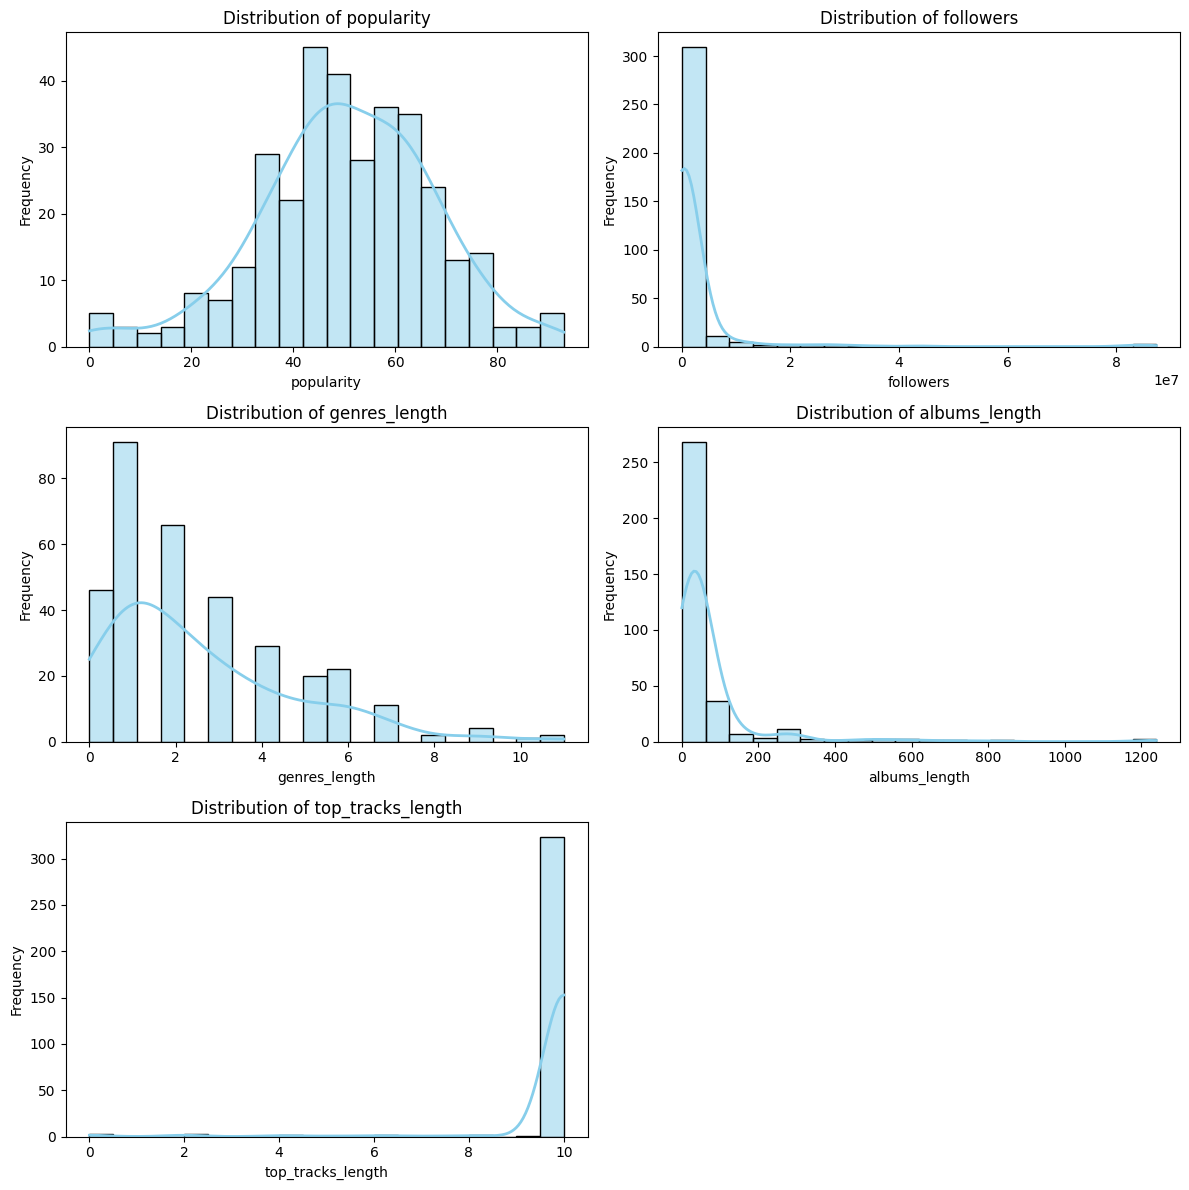

In [48]:
plot_numeric_distributions(df_copy)

In [49]:
df_copy[df_copy['top_tracks_length'] != 10]

,id,uri,name,genres,popularity,followers,albums,top_tracks,genres_length,albums_length,top_tracks_length
30,7r1VJ53RGn5jqR98Sgpe9l,spotify:artist:7r1VJ53RGn5jqR98Sgpe9l,Elli Eli,[],0,4116,[0dLuWZHyjOXhYRzaGWw5Dv],"[7xOpQZSxd04DgRcFf99xTL, 0STgyT9RdXB4q3qK4SJ1vX]",0,1,2
43,0bC6e2YtIRLbKx2txHFmEo,spotify:artist:0bC6e2YtIRLbKx2txHFmEo,alex_g_offline,[],63,466719,[1LsBYm2WOhgsqca4pxrvse],"[7EDcAz6iuKSkxH4VcC3Oko, 4Rsv5fRmgTH88RLp7xN5s...",0,1,4
62,6jdLQbJfJuo1uZf5TiHcpL,spotify:artist:6jdLQbJfJuo1uZf5TiHcpL,elin kastlander,[],0,31,[],[],0,0,0
69,1kgoGhvV1nEGVHFhY4VbcH,spotify:artist:1kgoGhvV1nEGVHFhY4VbcH,Jacal,[],27,2029,"[6b3trQL9v5MIku360PpFE2, 2B2KVj4tEeH5mdNTWARI7...","[6eJ83DMOPESUp67NcWMY53, 6onXw32PGm9MaLG4mJCwd...",0,5,7
102,6Hn9pU89wEARXZpfjb7Opy,spotify:artist:6Hn9pU89wEARXZpfjb7Opy,Ali Coyle,[],11,472,"[2OG7DnTlsCsCiJheFaeUY8, 2Q13oBkR1PfvYrQbV2iuz...","[1fsNU309woKdzhhvZw7ZXy, 0SGiKOjB9y2LeZtjd8ihM...",0,13,8
119,10Mq65D17BrcHPS8po0hKZ,spotify:artist:10Mq65D17BrcHPS8po0hKZ,Pierre Harmegnies,[],35,368,"[7K5tfkdeToVwZaEnEv2atb, 3GN7FSrFZDEUo1j1GbFcC...","[46Yno23oC4DjdkmgacPOMR, 1prMopMAGX5cLYI8DeRPqT]",0,5,2
132,7j4Cxpv8QCQq8SZ9Cb0ji8,spotify:artist:7j4Cxpv8QCQq8SZ9Cb0ji8,Graziella,[],23,231,"[5aaeREIXzhyklmJOTvsI2f, 6s7cdxuc1D5pOxJUoyKp4...","[7tTeEdOvxA72AZKM335awB, 5gUL5eIGcpS9xoJOQZr8l...",0,26,5
174,4DWl8U58uYeeTtlvbrLEY6,spotify:artist:4DWl8U58uYeeTtlvbrLEY6,Gordon Tracks,[],45,1112,"[2E1q8eohZZ1BUQ7Bq5WUIY, 5vPkXW6vf04tOaVP9DWEi...",[],0,3,0
184,3zW0xazqnHoq9QV9zBROVC,spotify:artist:3zW0xazqnHoq9QV9zBROVC,it's murph,[stutter house],56,44874,"[3zbFfZPvh2CZIaf8E6NATL, 0vEbniv3VNZ8wMPSRHUcd...","[5XFktAerFHxM4tp7EhzTrh, 7u0fz3V6cYeYTX91DMmIv...",1,7,6
189,27sdgIaFiz55vkR68fBiy8,spotify:artist:27sdgIaFiz55vkR68fBiy8,Alek Olsen,[corecore],62,72786,"[2YXww1viuuKZPi458rdopk, 28H6A2ylXGBsg2gDbLvQV...","[1lb0KfG9EyfSBsEifTUtXY, 75GwJi8ruSsNTBLoGBMFB...",1,11,8


It might happen that an artist does not have 10 songs yet.

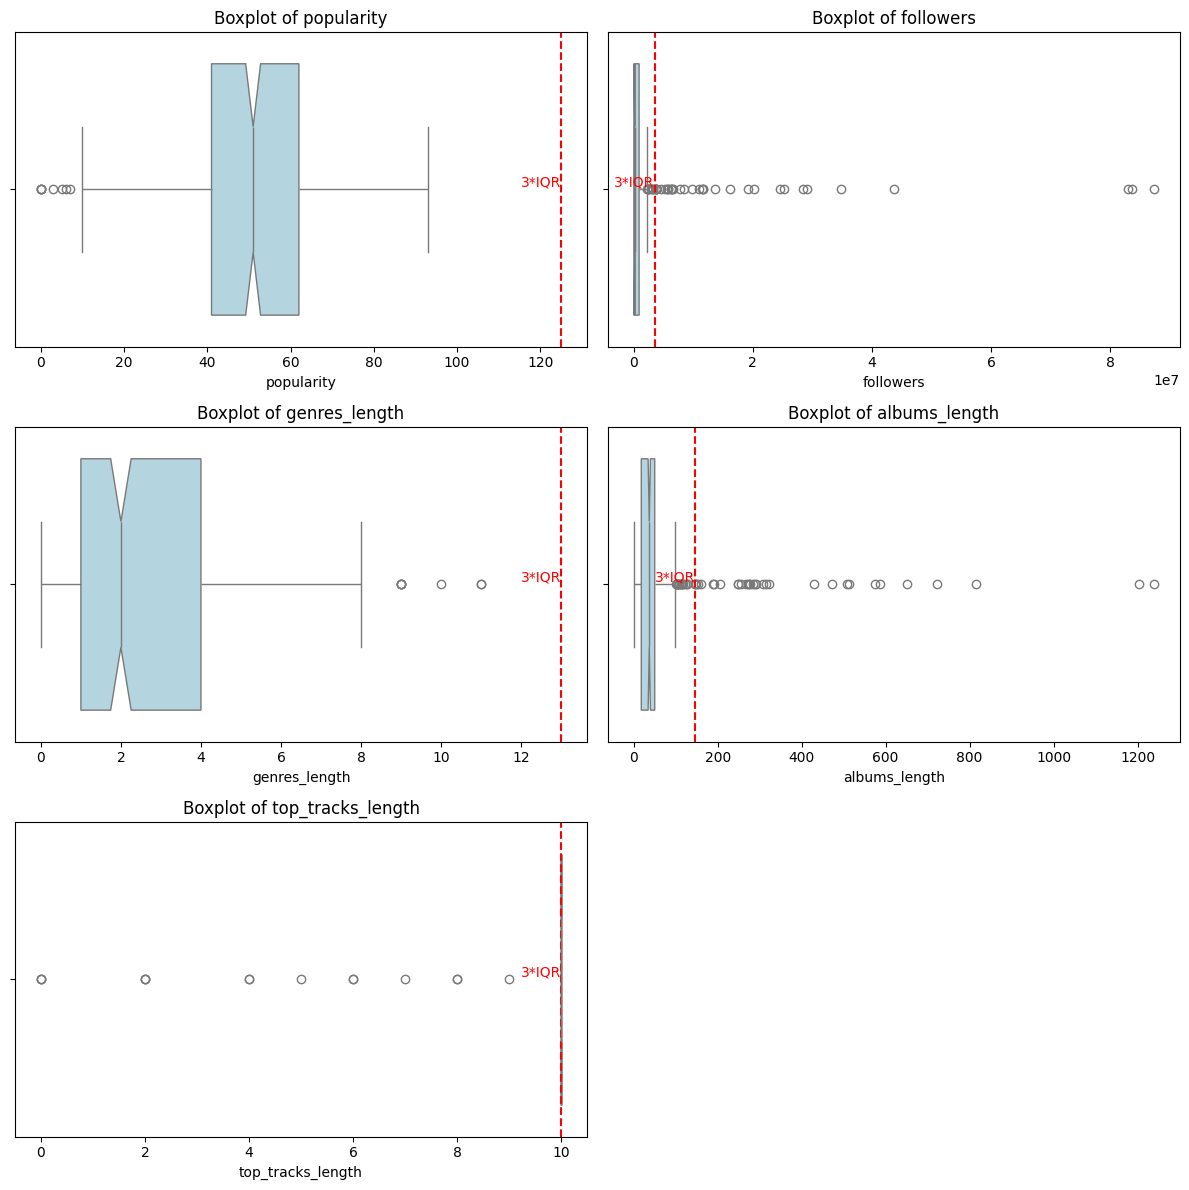

In [50]:
plot_boxplots_and_outliers(df_copy)

In [51]:
df_copy[df_copy['albums_length'] > 1000]

,id,uri,name,genres,popularity,followers,albums,top_tracks,genres_length,albums_length,top_tracks_length
0,1Xyo4u8uXC1ZmMpatF05PJ,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,"[canadian contemporary r&b, canadian pop, pop]",91,82994560,"[35dut3ICqF3NEDkjxfzJJ1, 1OARrXe5sB0gyy3MhQ8h9...","[7CyPwkp0oE8Ro9Dd5CUDjW, 7MXVkk9YMctZqd1Srtv4M...",3,1203,10
25,10exVja0key0uqUkk6LJRT,spotify:artist:10exVja0key0uqUkk6LJRT,Vance Joy,"[folk-pop, modern rock]",72,3055127,"[6pcblUE1ovhBPBCB7IHv8X, 2290QOqExnVHp302b4zYa...","[7yq4Qj7cqayVTp3FF9CWbm, 29jtZGdgpE2lWm2mkIt6H...",2,1239,10


Loads of albums by some artists, but most have only a few.

In [52]:
df_copy[df_copy['genres_length'] > 8]

,id,uri,name,genres,popularity,followers,albums,top_tracks,genres_length,albums_length,top_tracks_length
27,066X20Nz7iquqkkCW6Jxy6,spotify:artist:066X20Nz7iquqkkCW6Jxy6,LCD Soundsystem,"[alternative dance, alternative rock, art pop,...",56,1093309,"[6iVbNJBKV53qgNPKPpcBLt, 0hdimlCTCms7otJCX9Ovq...","[5MP8QCjsJQPJ5ApdHMg3dl, 2cmRpmO04TLaKPzmAzySY...",11,289,10
105,2o7L9DNcmzocYll1o0GGTU,spotify:artist:2o7L9DNcmzocYll1o0GGTU,Leon Vynehall,"[ambient house, deep house, electronica, float...",40,97367,"[5UfCxNbc7RTtM6FyVqyi5x, 079AdoqJO9xYz56hQPb6p...","[5AdcWcvRVnQvFtJ90A2XUK, 1OD2YXIOmfYmBAYfV1maR...",9,44,10
114,4FZ3j1oH43e7cukCALsCwf,spotify:artist:4FZ3j1oH43e7cukCALsCwf,Jack White,"[alternative rock, blues rock, garage rock, ga...",52,1321696,"[6CcC2RiYVSTsxI73d4lEeB, 4GxhBXlAhfNzI7ehTDmFJ...","[3ODl8J0TZAykdMCtCIO28n, 3T76zPJz3tWL27FrjJe2o...",9,62,10
209,31uyAcnY0kjjKKIQZMKX4i,spotify:artist:31uyAcnY0kjjKKIQZMKX4i,Grouper,"[ambient, ambient pop, art pop, dream pop, dro...",57,267592,"[1w3EOCPDwqWIiu2c1pHylJ, 5wy223m8JP5DBOvgumFgN...","[6Q5uDNuuFYa8ToL3CCoHPC, 35VfLKymw2iZKWnLTvm8X...",10,25,10
278,3kjuyTCjPG1WMFCiyc5IuB,spotify:artist:3kjuyTCjPG1WMFCiyc5IuB,Arcade Fire,"[alternative rock, baroque pop, canadian indie...",61,2271448,"[2sAePf08xIp4tnDlMUCV8B, 7xBJ2XXlDFfACXAnOE86t...","[5iItYl3Q6wCnKVfpK1uNVf, 6Hmj7SrLRbreLVfVS7mV1...",11,30,10
316,432R46LaYsJZV2Gmc4jUV5,spotify:artist:432R46LaYsJZV2Gmc4jUV5,Joy Division,"[alternative rock, art rock, indie rock, madch...",59,2404056,"[0KBdfMTMxi0oD1oVqApTjr, 1HnxC8MLDciii5LebJ09K...","[34iOH7LY3vme5rQxsVILZ4, 5fbQCQt91LsVgXusFS0CC...",9,248,10
321,4OrizGCKhOrW6iDDJHN9xd,spotify:artist:4OrizGCKhOrW6iDDJHN9xd,DIIV,"[brooklyn indie, dream pop, dreamo, indie rock...",48,365414,"[6GUbAGnzdeiPqKivIk6FKu, 5FFuado5azIt5lxMLQjCP...","[30uvCVEYqgktyLfDcI76Hx, 0JAxbxS5Hd2N7g8Sd01eq...",9,18,10


In [53]:
# get all unique genres
genres = set()
for genre in df['genres']:
    genres.update(genre)
f"There are {len(genres)} different genres in the artist dataset."

'There are 383 different genres in the artist dataset.'

In [54]:
f"There are {len(df[df['genres'].apply(lambda x: len(x) == 0)])} artists with no genres."

'There are 46 artists with no genres.'

In [55]:
# is there empty string in genres
len(df[df['genres'].apply(lambda x: '' in x)])

0

In [56]:
f"There are {len(df[df['albums'].apply(lambda x: len(x) == 0)])} artists with no albums."

'There are 2 artists with no albums.'

In [57]:
df[df['albums'].apply(lambda x: len(x) == 0)]

,id,uri,name,genres,popularity,followers,albums,top_tracks
62,6jdLQbJfJuo1uZf5TiHcpL,spotify:artist:6jdLQbJfJuo1uZf5TiHcpL,elin kastlander,[],0,31,[],[]
169,0LyfQWJT6nXafLPZqxe9Of,spotify:artist:0LyfQWJT6nXafLPZqxe9Of,Various Artists,[],0,2413050,[],"[4Y2iP7H0ouyXORPBUGRQKx, 0E5yP9VjrfG7wRyjWN9tr..."


In [58]:
# save df to data/formatted_artists.json
df.to_json('../data/formatted_artists.json', orient='records')